In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and and preprocess the groundtruth

with open('video_train/gt_sequence.txt', 'r') as f:
  data = [line.strip().split() for line in f.readlines()]

In [3]:
path = np.load('./predictions.npy') # Predictions 

In [4]:
# Evaluation based on average mean squared error between the predicted
# coordinates and the ground truth coordinates
mse_scores = []
gt_path = np.zeros((0, 3))
for pred_coord, pose in zip(path, data):
  gt_coord = np.array([float(pose[3]), float(pose[7]), float(pose[11])])
  gt_path = np.vstack((gt_path, gt_coord))
  mse_scores.append(np.linalg.norm(pred_coord - gt_coord))

# You can expect to get less than 40 MSE
mse_scores = np.mean(mse_scores)
print('avg_mse scores', mse_scores)

avg_mse scores 2.8232977288549583


/var/folders/72/wxbm5v_x3h11gxvtks54gv2w0000gn/T/ipykernel_54786/1926427536.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


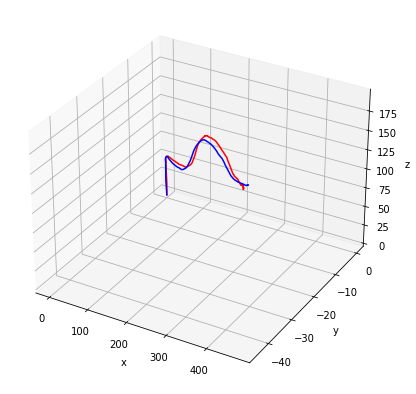

In [5]:
estimated_path = path
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(estimated_path[:, 0], estimated_path[:, 1], estimated_path[:, 2], 'r')
ax.plot3D(gt_path[:, 0], gt_path[:, 1], gt_path[:, 2], 'b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()